In [16]:
!pip install tensorflow_probability tensorboard

     |████████████████████████████████| 4.3 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 868 kB/s  eta 0:00:01
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 1.15.3 requires gast==0.2.2, but you'll have gast 0.4.0 which is incompatible.


In [18]:
!pip install 'tensorflow>=2.3'

     |████████████████████████████████| 165.1 MB 49 kB/s  eta 0:00:012   |███████▊                        | 40.1 MB 4.2 MB/s eta 0:00:31     |████████▎                       | 42.7 MB 5.7 MB/s eta 0:00:22     |███████████                     | 56.5 MB 2.6 MB/s eta 0:00:42     |███████████████▍                | 79.4 MB 3.2 MB/s eta 0:00:27     |████████████████▌               | 85.1 MB 4.7 MB/s eta 0:00:17     |██████████████████▏             | 93.6 MB 1.9 MB/s eta 0:00:37     |████████████████████            | 103.6 MB 4.2 MB/s eta 0:00:15     |█████████████████████████▉      | 133.3 MB 5.9 MB/s eta 0:00:06
     |████████████████████████████████| 15.1 MB 8.4 MB/s eta 0:00:01    |██████████████                  | 6.6 MB 4.0 MB/s eta 0:00:03     |███████████████████████████▏    | 12.9 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 7.9 MB/s eta 0:00:011
  Using cached gast-0.3.3-py2.py3-none-any.w

In [1]:
from sklearn.datasets import fetch_openml
%matplotlib inline

In [2]:
X, y = fetch_openml(data_id=1565, return_X_y=True, as_frame=True)

In [3]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0


In [4]:
y.astype(int).min()

1

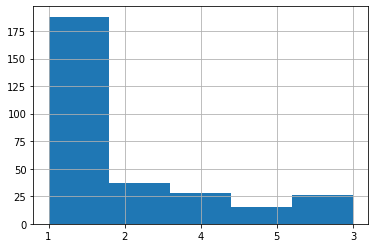

In [5]:
y.hist(bins=5)

In [6]:
target = (y.astype(int) > 1).astype(float)

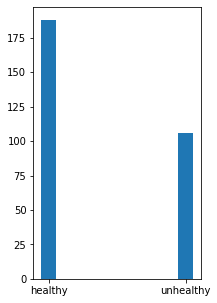

In [7]:
from matplotlib import pyplot as plt

target.hist(figsize=(3, 5), rwidth=5)
plt.xticks([0.05, 0.95], ['healthy', 'unhealthy'])
plt.grid(b=None)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [9]:
X_t

array([[-1.00359234,  0.61666984, -1.02025916, ..., -0.73929521,
        -0.11089228, -0.32235972],
       [ 0.15047343, -1.62161328,  0.01765154, ...,  1.37092607,
        -0.11089228, -0.32235972],
       [-1.38828093,  0.61666984, -1.02025916, ..., -0.73929521,
        -0.11089228, -0.32235972],
       ...,
       [ 0.0222439 ,  0.61666984,  0.01765154, ..., -0.73929521,
        -0.11089228,  3.14497288],
       [-0.10598563, -1.62161328, -1.02025916, ...,  1.17908777,
        -0.11089228, -0.32235972],
       [ 0.66339155,  0.61666984,  1.05556224, ..., -0.73929521,
        -0.11089228, -0.32235972]])

In [10]:
from sklearn.model_selection import train_test_split

Xt_train, Xt_test, y_train, y_test = train_test_split(
    X_t, target, test_size=0.33, random_state=42
)  # for neural networks
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.33, random_state=42
)  # for decision tree approaches

In [11]:
X.isnull().sum(axis=0).any()

False

In [12]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
from tensorflow import keras

negloglik = lambda y, p_y: -p_y.log_prob(y)

model = keras.Sequential([
  keras.layers.Dense(12, activation='relu', name='hidden'),
  keras.layers.Dense(1, name='output'),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Bernoulli(logits=t)
  ),
])

model.compile(optimizer=tf.optimizers.Adagrad(learning_rate=0.05), loss=negloglik)

In [14]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, monitor='loss'),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]
history = model.fit(
    Xt_train,
    y_train.values,
    epochs=10000,
    verbose=False,
    callbacks=callbacks
)

Instructions for updating:
use `tf.profiler.experimental.stop` instead.


In [16]:
print(len(history.epoch))

2975


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 12)                168       
_________________________________________________________________
output (Dense)               (None, 1)                 13        
_________________________________________________________________
distribution_lambda (Distrib ((None, 1), (None, 1))    0         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [18]:
y_pred = model(Xt_test)

In [19]:
def to_one_hot(a):
    """convert from integer encoding to one-hot"""
    b = np.zeros((a.size, 2))
    b[np.arange(a.size), np.rint(a).astype(int)] = 1
    return b

In [20]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

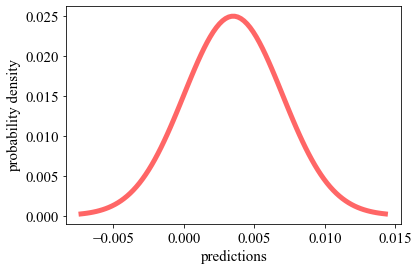

In [23]:
from scipy.stats import norm
import numpy as np


a, b = y_pred.mean().numpy()[10], y_pred.variance().numpy()[10]
fig, ax = plt.subplots(1, 1)
x = np.linspace(
    norm.ppf(0.001, a, b),
    norm.ppf(0.999, a, b),
    100
)
pdf = norm.pdf(x, a, b)
ax.plot(
    x, 
    pdf / np.sum(pdf), 
    'r-', lw=5, alpha=0.6, 
    label='norm pdf'
)
plt.ylabel('probability density')
plt.xlabel('predictions');

In [24]:
def to_classprobs(y_pred):
    class_probs = np.zeros(shape=(y_pred.mean().numpy().shape[0], 2))
    for i, (a, b) in enumerate(zip(y_pred.mean().numpy(), y_pred.variance().numpy())):
        conf = norm.cdf(0.5, a, b)
        class_probs[i, 0] = conf
        class_probs[i, 1] = 1 - conf
    return class_probs

class_probs = to_classprobs(y_pred)

In [25]:
import sklearn

In [27]:
'auc score: {:.3f}'.format(sklearn.metrics.roc_auc_score(to_one_hot(y_test), class_probs))

'auc score: 0.810'

In [28]:
class ModelWrapper(sklearn.base.ClassifierMixin):
    _estimator_type = 'classifier'
    classes_ = [0, 1]
    def predict_proba(self, X):
        pred = model(X)
        return to_classprobs(pred)
    
model_wrapper = ModelWrapper()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.77')

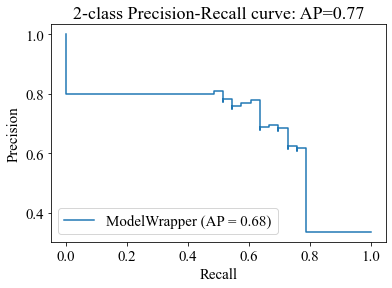

In [29]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score


average_precision = average_precision_score(to_one_hot(y_test), class_probs)
fig = plot_precision_recall_curve(model_wrapper, Xt_test, y_test)
fig.ax_.set_title(
    '2-class Precision-Recall curve: '
    'AP={0:0.2f}'.format(average_precision)
)

In [30]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
from tensorflow import keras

negloglik = lambda y, p_y: -p_y.log_prob(y)

model = keras.Sequential([
  keras.layers.Dense(12, activation='relu', name='hidden'),
  keras.layers.Dense(1, name='output'),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Bernoulli(logits=t)
  ),
])

model.compile(optimizer=tf.optimizers.Adagrad(learning_rate=0.05), loss=negloglik)
